## import bibliotek

In [1]:
import copy
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import optuna
from optuna.trial import Trial
import torch.optim.swa_utils as swa_utils


## Generowaie funkcji losowej

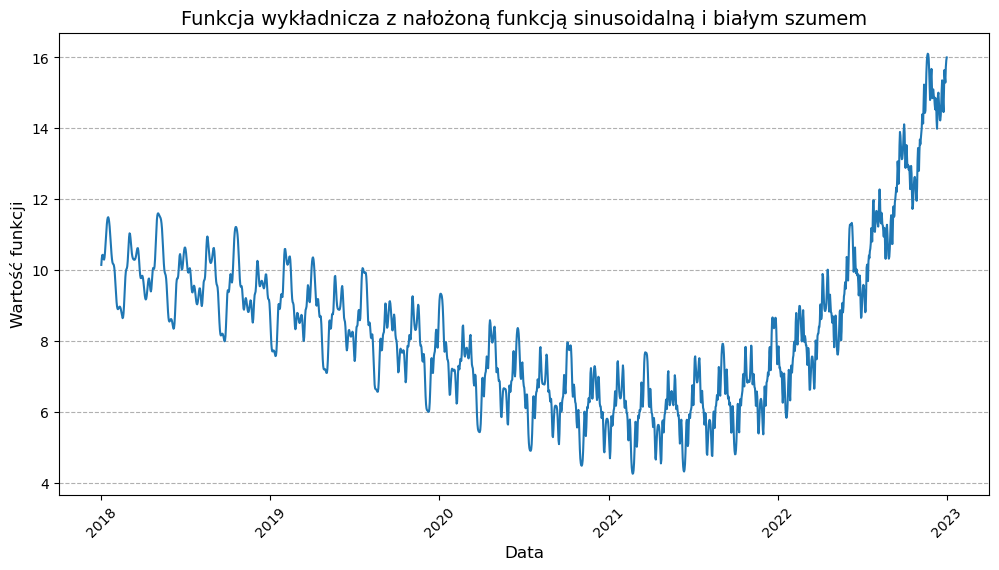

In [2]:
# Twój szereg czasowy (przykładowe dane)
daty = pd.date_range(start='2018-01-01', end='2022-12-31', freq='D')
df = pd.DataFrame({'data': daty})
df.set_index('data', inplace=True)

# # Utwórz wektor czasu o długości takiej samej jak df
t = np.linspace(1, 4, len(df))  # Skalujemy czas do przedziału [0, 1]

# # Wygeneruj funkcję wielomianową
# poly_func = 2 * t**3 - 8 * t**2 + 2*t  # Przykładowy wielomian

# # Wygeneruj funkcję sinusoidalną
# sin_func = np.sin(18 * np.pi * t)

# # Wygeneruj biały szum
# noise = np.random.normal(0, 0.0015, len(df))

# # Połącz funkcje i dodaj do DataFrame'u
# df['combined_func'] = poly_func + sin_func + noise

# Trial 151 finished with value: 4.206409399770564 and parameters: 
# {'hidden_dim': 7, 'num_layers': 1, 
# 'lerning_opti_rate': 0.007526508076627938, 
# 'dropout_prob': 0.05088814404525758,
# 'weight_decay': 0.0004296664716162247,
# 'seq_length': 14, 'swa_start': 45}. Best is trial 151 with value: 4.206409399770564.
#######################################################################################


# Parametry funkcji
a = 0.1
b = -0.55
c = 1.1
d = -2
e = 1.5
f = 0.75
g = 4
h = 18
i = 22

# Wygeneruj funkcję wielomianową
poly_func = a * t**5 + b * t**4 + c * t**3 + d * t**2 + e * t +10

# Wygeneruj funkcję sinusoidalną nośną
sin_func = np.sin(i * np.pi * t)

# Wygeneruj funkcję modulującą
modulating_func = f * np.sin(g * (np.pi**2 + sin_func) * t)

# Zastosuj modulację amplitudy
modulated_sin_func = (1 + modulating_func) * sin_func

# Wygeneruj biały szum
noise = np.random.normal(0, 0.001, len(df))

# Połącz funkcje i dodaj do DataFrame'u
df['combined_func'] = poly_func + modulated_sin_func + noise 


# Tworzenie wykresu liniowego
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['combined_func'])

# Ustawienia wykresu
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość funkcji', fontsize=12)
plt.title('Funkcja wykładnicza z nałożoną funkcją sinusoidalną i białym szumem', fontsize=14)
plt.xticks(rotation=45)  # Obrót etykiet osi X dla lepszej czytelności
plt.grid(axis='y', linestyle='--')  # Dodanie siatki na osi Y

# Wyświetlenie wykresu
plt.show()

In [ ]:
# from statsmodels.tsa.seasonal import MSTL, DecomposeResult, STL, seasonal_decompose

# total_column = df['combined_func']
# # Dekompozycja MSTL
# mstl = seasonal_decompose(total_column)  # Zakładamy sezonowość roczną (365 dni)
# result = mstl.fit()

# # Przygotowanie danych do wizualizacji w seaborn
# df_results = pd.DataFrame({
#     'Oryginalne dane': total_column,
#     'Trend': result.trend,
#     'Sezonowość (roczna)': result.seasonal,
#     'Reszta': result.resid
# })
# df_results = df_results.stack().reset_index()  # Przekształcenie do formatu "długiego"
# df_results.columns = ['Czas', 'Składowa', 'Wartość']

# df_results.to_csv('MSTL.txt')
# # Wizualizacja z seaborn
# sns.set_theme(style="darkgrid")

# plt.figure(figsize=(14, 10))
# sns.lineplot(x='Czas', y='Wartość', hue='Składowa', data=df_results)
# plt.title('Dekompozycja MSTL')
# plt.xlabel('Czas')
# plt.ylabel('Wartość')
# plt.legend(title='Składowe')
# plt.show()

# # Opcjonalnie: Możesz wyświetlić podsumowanie dekompozycji, ale funkcja summary() nie jest jeszcze dostępna
# # w statsmodels dla obiektów DecomposeResult. Możesz śledzić rozwój tej funkcjonalności.
# # print(result.summary())  

In [ ]:
# Twój szereg czasowy (przykładowe dane)
datyy = pd.date_range(start='2018-01-01', end='2024-12-31', freq='D')
dff = pd.DataFrame({'data': datyy})
dff.set_index('data', inplace=True)

# # Utwórz wektor czasu o długości takiej samej jak df
t = np.linspace(1, 2.400328587075575, len(dff))  # Skalujemy czas do przedziału [0, 1]

# Parametry funkcji
a = 0.1
b = -0.5
c = 1
d = -2
e = 0.5
f = 0.75
g = 6
h = 31
i = 31

# Wygeneruj funkcję wielomianową
poly_func = a * t**5 + b * t**4 + c * t**3 + d * t**2 + e * t +2

# Wygeneruj funkcję sinusoidalną nośną
sin_func = np.sin(i * np.pi * t)

# Wygeneruj funkcję modulującą
modulating_func = f * np.sin(g * (np.pi**2 + sin_func) * t)

# Zastosuj modulację amplitudy
modulated_sin_func = (1 + modulating_func) * sin_func

# Wygeneruj biały szum
noise = np.random.normal(0, 0.001, len(dff))

# Połącz funkcje i dodaj do DataFrame'u
dff['combined_func'] = poly_func + modulated_sin_func + noise 


# Tworzenie wykresu liniowego
plt.figure(figsize=(12, 6))
sns.lineplot(x=dff.index, y=dff['combined_func'])

# Ustawienia wykresu
plt.xlabel('Data', fontsize=12)
plt.ylabel('Wartość funkcji', fontsize=12)
plt.title('Funkcja wykładnicza z nałożoną funkcją sinusoidalną i białym szumem', fontsize=14)
plt.xticks(rotation=45)  # Obrót etykiet osi X dla lepszej czytelności
plt.grid(axis='y', linestyle='--')  # Dodanie siatki na osi Y

# Wyświetlenie wykresu
plt.show()

### Generowanie podziału

In [ ]:
# Ustawienia podziału
n_splits = 4  # Liczba foldów
fold_size = len(df) // n_splits  # Zaokrąglenie w dół, aby uniknąć przekroczenia zakresu

# Funkcja do generowania indeksów podziału
def custom_time_series_split(df, n_splits, fold_size):
    fold_start = 0  # Zaczynamy od początku
    for i in range(n_splits):
        fold_end = fold_start + fold_size - 1

        train_size = int(fold_size * 0.80)  # 85% na trening
        val_size = int(fold_size * 0.10)  # 10% na walidację
        test_size = fold_size - train_size - val_size  # 5% na test

        train_end = fold_start + train_size - 1
        val_start = train_end + 1
        val_end = val_start + val_size - 1
        test_start = val_end + 1
        test_end = fold_end

        # Indeksy dla zbiorów
        train_index = df.iloc[fold_start: train_end + 1].index
        test_index = df.iloc[test_start: test_end + 1].index

        # Sprawdzenia diagnostyczne
        assert train_end < val_start, f"Fold {i+1}: Zbiór treningowy nachodzi na walidacyjny!"
        assert val_end < test_start, f"Fold {i+1}: Zbiór walidacyjny nachodzi na testowy!"
        assert test_end <= len(df) - 1, f"Fold {i+1}: Zbiór testowy wykracza poza zakres danych!"

        yield train_index, test_index

        fold_start = test_end + 1  # Kolejny fold zaczyna się po końcu poprzedniego testu

# Iteracja po foldach
for fold, (train_index, test_index) in enumerate(custom_time_series_split(df, n_splits, fold_size)):
    # Wyświetlanie indeksów w jednym wierszu
    val_start_date = train_index[-1] + pd.DateOffset(days=1)  # Zaczynamy dzień po treningu
    val_end_date = test_index[0] - pd.DateOffset(days=1)  # Kończymy dzień przed testem

    print(f"\nFold {fold+1}:")
    print(f"  Trening: od {train_index[0].date()} do {train_index[-1].date()}")
    print(f"  Walidacja: od {val_start_date.date()} do {val_end_date.date()}")
    print(f"  Test: od {test_index[0].date()} do {test_index[-1].date()}")


# Prosty model

In [ ]:
# Definicja modelu LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout(out)  # Dodajemy Dropout po warstwie LSTM
        out = self.fc(out)
        return out

class ImprovedLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_prob, bidirectional=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim)  
        self.gelu = nn.GELU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.ln1 = nn.LayerNorm(hidden_dim * 2) 

    def forward(self, x):
        out, _ = self.lstm(x)
        # Łączenie wyników z obu kierunków
        out = torch.cat((out[:, :, :hidden_dim], out[:, :, hidden_dim:]), dim=-1)
        out = self.ln1(out)  
        out = self.fc1(out)
        out = self.gelu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out
###############################################################################################################################
###############################################################################################################################
##############################################################################################################################
class TimeSeriesDataset(Dataset):
    def __init__(self, df, index, seq_length):
        self.data = torch.tensor(df.loc[index].values).float()
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        return self.data[idx : idx + self.seq_length]  # Zwróć sekwencję

def create_data_loaders(df, train_index, val_index, test_index, seq_length, batch_size=32):
    train_dataset = TimeSeriesDataset(df, train_index, seq_length)
    val_dataset = TimeSeriesDataset(df, val_index, seq_length)
    test_dataset = TimeSeriesDataset(df, test_index, seq_length)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader


def train_epoch(model, data_loader, criterion, optimizer):
    model.train()
    train_loss = 0.0

    for batch in data_loader:
        optimizer.zero_grad()
        outputs = model(batch)

        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    return train_loss / len(data_loader)

def evaluate(model, data_loader, criterion):
    model.eval()
    eval_loss = 0.0

    with torch.no_grad():
        for batch in data_loader:
            outputs = model(batch)
            loss = criterion(outputs, batch)
            eval_loss += loss.item()

    return eval_loss / len(data_loader)

# Parametry modelu
# Parametry modelu po optymalizacji hiper paramatrów
input_dim = 1
output_dim = 1  # Przewidywana wartość
num_epochs = 160
# Hiperparametry po optymalizacji
hidden_dim   = 97
num_layers   = 1
lr           = 0.0033268739649334263
dropout_prob = 0.06777666398606595
weight_decay = 0.0009819437899288865
seq_length   = 10
swa_start    = 46
#################### LSTMModel with Early stopping at 48 ####################################################
# Trial 285 finished with value: 0.6615267680026591 and parameters:                                  &&&&&&&&
#     {'hidden_dim': 97, 'num_layers': 1, 'lerning_opti_rate': 0.0033268739649334263,                ^^^^^^^^
#      'dropout_prob': 0.06777666398606595, 'weight_decay': 0.0009819437899288865,                   %%%%%%%
#      'seq_length': 10, 'swa_start': 46, 'patience_LROnPlateau': 23, 'anneal_epoch_SWALR': 10,      $$$$$$$$
#      'SWALR_lerning_rate': 0.011171795367572533}. Best is trial 285 with value: 0.6615267680026591 ########
##############################################################################################################        
# Tworzenie modelu i optymalizatora
model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
#model = ImprovedLSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
swa_model = swa_utils.AveragedModel(model)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

# Funkcja straty i schedulery
criterion = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, "min", patience=23)
swa_scheduler = swa_utils.SWALR(
    optimizer, anneal_strategy="linear", anneal_epochs=10, swa_lr= 0.011171795367572533
)

total_val_loss = 0.0
total_test_loss = 0.0 


# Iteracja po foldach
for fold, (train_index, test_index) in enumerate(custom_time_series_split(df, n_splits, fold_size)):
    # Wyświetlanie indeksów w jednym wierszu
    val_start_date = train_index[-1] + pd.DateOffset(days=1)  # Zaczynamy dzień po treningu
    val_end_date = test_index[0] - pd.DateOffset(days=1)  # Kończymy dzień przed testem
    val_index = df[(df.index >= val_start_date) & (df.index <= val_end_date)].index

    train_loader, val_loader, test_loader = create_data_loaders(df, train_index, val_index, test_index,seq_length=seq_length)

    best_val_loss = float('inf')  # Dla wczesnego zatrzymania
    patience_counter = 0
    # Trening
    for epoch in range(num_epochs):
        train_loss = train_epoch(model, train_loader, criterion, optimizer)

        # Walidacja
        val_loss = evaluate(model, val_loader, criterion)
        #print(f"Fold {fold+1}, Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

        # Wczesne zatrzymanie
        # if val_loss < best_val_loss:
        #     best_val_loss = val_loss
        #     patience_counter = 0
        # else:
        #     patience_counter += 1
        #     if patience_counter >= 48:  # Przerwij po 15 epokach bez poprawy
        #         print(f"Early stopping at epoch {epoch+1}")
        #         break

        if epoch > swa_start:
            swa_model.update_parameters(model)
            swa_scheduler.step()
        else:
            scheduler.step(val_loss)

    # Aktualizacja Batch Normalization i SWA po każdym foldzie
    swa_utils.update_bn(train_loader, swa_model)
    swa_model.update_parameters(model)
    
    # Test (ewaluacja na zbiorze testowym)
    test_loss = evaluate(model, test_loader, criterion)
    print(f"Fold {fold+1}, Test Loss: {test_loss:.4f}")

    # Wizualizacja
    plt.figure(figsize=(12, 6))

    # Oryginalne dane
    plt.plot(df.index, df.values, label="Dane oryginalne", color="blue")

    # Dane treningowe
    plt.plot(train_index, df.loc[train_index], label="Trening", color="green")

    # Dane walidacyjne
    plt.plot(val_index, df.loc[val_index], label="Walidacja", color="orange")

    # Dane testowe i predykcje
    plt.plot(test_index, df.loc[test_index], label="Test (rzeczywiste)", color="red")
    with torch.no_grad():
        test_pred = model(torch.tensor(df.loc[test_index].values).float().unsqueeze(0))
    plt.plot(test_index, test_pred.numpy().flatten(), label="Test (predykcje)", color="purple", linestyle="--")

    plt.xlabel("Data")
    plt.ylabel("Wartość")
    plt.title(f"Fold {fold + 1}")
    plt.legend()
    plt.show()
# Fold 1, Test Loss: 0.0063 | Fold 2, Test Loss: 0.0137| Fold 3, Test Loss: 0.0014| Fold 4, Test Loss: 1.3554            

## Optuna

In [ ]:
# class TimeSeriesDataset(Dataset):
#     def __init__(self, df, index, seq_length):
#         self.data = torch.tensor(df.loc[index].values).float()
#         self.seq_length = seq_length

#     def __len__(self):
#         return len(self.data) - self.seq_length

#     def __getitem__(self, idx):
#         return self.data[idx : idx + self.seq_length]  # Zwróć sekwencję


# # Definicja modelu LSTM
# class LSTMModel(nn.Module):
#     def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
#         super().__init__()
#         self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
#         self.dropout = nn.Dropout(dropout_prob)
#         self.fc = nn.Linear(hidden_dim, output_dim)

#     def forward(self, x):
#         out, _ = self.lstm(x)
#         out = self.dropout(out)  # Dodajemy Dropout po warstwie LSTM
#         out = self.fc(out)
#         return out

# def create_data_loaders(df, train_index, val_index, test_index, seq_length, batch_size=32):
#     train_dataset = TimeSeriesDataset(df, train_index, seq_length)
#     val_dataset = TimeSeriesDataset(df, val_index, seq_length)
#     test_dataset = TimeSeriesDataset(df, test_index, seq_length)

#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
#     val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
#     return train_loader, val_loader, test_loader


# def train_epoch(model, data_loader, criterion, optimizer):
#     model.train()
#     train_loss = 0.0

#     for batch in data_loader:
#         optimizer.zero_grad()
#         outputs = model(batch)

#         loss = criterion(outputs, batch)
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item()

#     return train_loss / len(data_loader)

# def evaluate(model, data_loader, criterion):
#     model.eval()
#     eval_loss = 0.0

#     with torch.no_grad():
#         for batch in data_loader:
#             outputs = model(batch)
#             loss = criterion(outputs, batch)
#             eval_loss += loss.item()

#     return eval_loss / len(data_loader)

# # Parametry modelu
# #seq_length = 10  # Długość sekwencji wejściowej
# input_dim = 1
# output_dim = 1  # Przewidywana wartość
# num_epochs = 160

# def objective(trial: Trial, df, n_splits, fold_size):
#     # Hiperparametry do optymalizacji
#     hidden_dim = trial.suggest_int("hidden_dim", 4, 186)
#     num_layers = trial.suggest_int("num_layers", 1, 3)
#     lr         = trial.suggest_float("lerning_opti", 1e-6, 1e-2)
#     dropout_prob = trial.suggest_float("dropout_prob", 0.0, 0.4)
#     weight_decay = trial.suggest_float("weight_decay", 1e-7, 1e-3)
#     seq_length  =  trial.suggest_int("seq_length", 4, 16)

#     # Tworzenie modelu i optymalizatora
#     model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
#     optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)

#     # Funkcja straty i scheduler
#     criterion = nn.MSELoss()
#     scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, "max", patience=22)

#     total_val_loss = 0.0  # strata walidacyjna
#     total_test_loss = 0.0  # strata testowa
    
#     # Iteracja po foldach
#     for fold, (train_index, test_index) in enumerate(custom_time_series_split(df, n_splits, fold_size)):
        
#         # Obliczanie indeksów walidacyjnych
#         val_start_date = train_index[-1] + pd.DateOffset(days=1)
#         val_end_date = test_index[0] - pd.DateOffset(days=1)
#         val_index = df[(df.index >= val_start_date) & (df.index <= val_end_date)].index

#         # Tworzenie DataLoaderów
#         train_loader, val_loader, test_loader = create_data_loaders(
#             df, train_index, val_index, test_index, seq_length
#         )

#         best_val_loss = float("inf")
#         patience_counter = 0

#         # Trening
#         for epoch in range(num_epochs):
#             train_loss = train_epoch(model, train_loader, criterion, optimizer)
#             val_loss = evaluate(model, val_loader, criterion)
#             test_loss = evaluate(model, test_loader, criterion)

#             # Raportowanie wyniku do Optuny
#             trial.report(val_loss + test_loss, epoch)

#             # Wczesne zatrzymanie przez Optunę
#             # if trial.should_prune():
#             #     raise optuna.exceptions.TrialPruned()

#             # Wczesne zatrzymywanie i zapamiętywanie najlepszego modelu
#             if val_loss < best_val_loss:
#                 best_val_loss = val_loss
#                 patience_counter = 0
#             else:
#                 patience_counter += 1
#                 if patience_counter >= 14:
#                     break
#             total_val_loss += best_val_loss
#             total_test_loss += test_loss
#             scheduler.step(val_loss)

#     avg_val_loss = total_val_loss / n_splits
#     avg_test_loss = total_test_loss / n_splits

#     return avg_val_loss + avg_test_loss
# # Uruchomienie optymalizacji
# study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(n_startup_trials=48), pruner=None) 
# study.optimize(lambda trial: objective(trial, df, n_splits, fold_size), n_trials=30)  

# print("Najlepsze hiperparametry:", study.best_params)
# fig = optuna.visualization.plot_parallel_coordinate(study)
# fig.show()

## Optuna V2

In [ ]:
class TimeSeriesDataset(Dataset):
    def __init__(self, df, index, seq_length):
        self.data = torch.tensor(df.loc[index].values).float()
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        return self.data[idx : idx + self.seq_length]  # Zwróć sekwencję

############################################################################################################################
# Definicja modelu LSTM
class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout(out)  
        out = self.fc(out)
        return out
###########################################################################################################################
class ImprovedLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, bidirectional=True)  # Usunięto dropout
        self.dropout1 = nn.Dropout(dropout_prob)  # Dropout po LSTM
        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim)
        self.gelu = nn.GELU()
        self.dropout2 = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.ln1 = nn.LayerNorm(hidden_dim * 2)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.dropout1(out)
        out = torch.cat((out[:, :, :hidden_dim], out[:, :, hidden_dim:]), dim=-1)
        out = self.ln1(out)
        out = self.fc1(out)
        out = self.gelu(out)
        out = self.dropout2(out)
        out = self.fc2(out)
        return out
############################################################################################################################
class CNN_LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob, kernel_size=3):
        super().__init__()
        self.conv1d = nn.Conv1d(in_channels=input_dim, out_channels=hidden_dim, kernel_size=kernel_size, padding=1)
        self.gelu = nn.GELU()
        self.batch_norm = nn.BatchNorm1d(hidden_dim)
        self.lstm = nn.LSTM(input_size=hidden_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True,
                            dropout=dropout_prob if num_layers > 1 else 0)
        self.dropout = nn.Dropout(dropout_prob)
        self.fc = nn.Linear(in_features=hidden_dim, out_features=output_dim)

    def forward(self, x):
        x = x.permute(0, 2, 1) 
        out = self.conv1d(x)
        out = self.gelu(out)
        out = self.batch_norm(out)
        out = out.permute(0, 2, 1) 
        out, _ = self.lstm(out)
        out = self.dropout(out)
        out = self.fc(out)
        return out
############################################################################################################################
class NBeatsBlock(nn.Module):
    def __init__(self, input_size, theta_size, basis_function, backcast_length, forecast_length, layer_norm=True):
        super().__init__()
        self.basis_function = basis_function
        self.fc1 = nn.Linear(backcast_length, theta_size)
        self.fc2 = nn.Linear(theta_size, forecast_length)
        self.layer_norm = nn.LayerNorm(theta_size) if layer_norm else nn.Identity()

    def forward(self, x):
        backcast, forecast = x[:, :-self.forecast_length], x[:, -self.forecast_length:]
        theta_b = self.layer_norm(self.fc1(backcast))
        theta_f = self.layer_norm(self.fc1(forecast))
        backcast = self.basis_function(theta_b)
        forecast = self.basis_function(theta_f)
        return backcast, forecast


class NBeats(nn.Module):
    def __init__(self, input_size, stack_types, nb_blocks_per_stack, forecast_length, backcast_length, thetas_dim, share_weights_in_stack, basis_function, layer_norm=True):
        super().__init__()
        self.forecast_length = forecast_length
        self.backcast_length = backcast_length
        self.stacks = nn.ModuleList([
            self.create_stack(input_size, stack_type, nb_blocks, forecast_length, backcast_length, thetas_dim[i], share_weights_in_stack[i], basis_function[i], layer_norm)
            for i, stack_type in enumerate(stack_types)
        ])

    def create_stack(self, input_size, stack_type, nb_blocks, forecast_length, backcast_length, theta_size, share_weights, basis_function, layer_norm):
        blocks = nn.ModuleList([
            NBeatsBlock(input_size, theta_size, basis_function, backcast_length, forecast_length, layer_norm)
            for _ in range(nb_blocks)
        ])
        if share_weights:
            for block in blocks[1:]:
                block.fc1 = blocks[0].fc1
                block.fc2 = blocks[0].fc2
        return blocks

    def forward(self, x):
        B, T = x.shape
        forecast = torch.zeros(size=(B, self.forecast_length), device=x.device)  # Użycie tego samego urządzenia co x
        for stack in self.stacks:
            for block in stack:
                backcast, block_forecast = block(x)
                x = x - backcast
                forecast = forecast + block_forecast
        return forecast
#############################################################################################################################

def create_data_loaders(df, train_index, val_index, test_index, seq_length, batch_size=24):
    train_dataset = TimeSeriesDataset(df, train_index, seq_length)
    val_dataset = TimeSeriesDataset(df, val_index, seq_length)
    test_dataset = TimeSeriesDataset(df, test_index, seq_length)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, val_loader, test_loader


def train_epoch(model, data_loader, criterion, optimizer):
    model.train()
    train_loss = 0.0

    for batch in data_loader:
        optimizer.zero_grad()
        outputs = model(batch)

        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    return train_loss / len(data_loader)

def evaluate(model, data_loader, criterion):
    model.eval()
    eval_loss = 0.0

    with torch.no_grad():
        for batch in data_loader:
            outputs = model(batch)
            
            loss = criterion(outputs, batch)
            eval_loss += loss.item()

    return eval_loss / len(data_loader)

# Parametry modelu
#seq_length = 10  # Długość sekwencji wejściowej
input_dim = 1
output_dim = 1  # Przewidywana wartość
num_epochs = 80

def objective(trial: Trial, df, n_splits, fold_size):
    # Hiperparametry do optymalizacji
    hidden_dim   = trial.suggest_int("hidden_dim", 4, 328)
    num_layers   = trial.suggest_int("num_layers", 1, 6)
    lr            = trial.suggest_float("lerning_opti_rate", 1e-6, 1e-2)
    dropout_prob  = trial.suggest_float("dropout_prob", 0.0, 0.35)
    weight_decay  = trial.suggest_float("weight_decay", 1e-7, 1e-3)
    seq_length    = trial.suggest_int("seq_length", 4, 16)
    swa_start     = trial.suggest_int("swa_start", 20, 50)  
    patience      = trial.suggest_int('patience_LROnPlateau', 6, 24 )
    anneal_epochs = trial.suggest_int('anneal_epoch_SWALR', 6 , 24 )
    swa_lr        = trial.suggest_float("SWALR_lerning_rate", 1e-6, 5e-2)

    total_val_loss = 0.0
    total_test_loss = 0.0
    
    # Iteration through folds
    for fold, (train_index, test_index) in enumerate(custom_time_series_split(df, n_splits, fold_size)):
        # Print indexes in one line
        val_start_date = train_index[-1] + pd.DateOffset(days=1)  # Start the day after training
        val_end_date = test_index[0] - pd.DateOffset(days=1)  # End the day before testing
        val_index = df[(df.index >= val_start_date) & (df.index <= val_end_date)].index

        # Ensure consistent data loaders for each trial and avoid shuffling for validation and test
        train_loader, val_loader, test_loader = create_data_loaders(df, train_index, val_index, test_index, seq_length=seq_length)

        # Reset Model State
        #model = LSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
        #model = ImprovedLSTMModel(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
        model = CNN_LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
        #model = NBeats(input_size, stack_types, nb_blocks_per_stack, forecast_length, backcast_length, thetas_dim, share_weights_in_stack, basis_function)
        swa_model = swa_utils.AveragedModel(model)

        # Reset Optimizer State - NEW
        optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
        scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, "min", patience=patience)
        swa_scheduler = swa_utils.SWALR(optimizer, anneal_strategy="linear", anneal_epochs=anneal_epochs, swa_lr=swa_lr)

        best_val_loss = float('inf')  # For early stopping

        # Training 
        for epoch in range(num_epochs):
            train_loss = train_epoch(model, train_loader, criterion, optimizer)
            val_loss = evaluate(model, val_loader, criterion)
            
            # Update lr, but only for one scheduler         
            if epoch > swa_start:
                swa_model.update_parameters(model)
                swa_scheduler.step()
            else:
                scheduler.step(val_loss)
            
            trial.report(val_loss, epoch)  # Report validation loss at each epoch
        
        # Update Batch Normalization and SWA after each fold
        swa_model.update_parameters(model)
        swa_utils.update_bn(train_loader, swa_model)  
        
        # Evaluation (on the test set)
        val_loss = evaluate(swa_model, val_loader, criterion)
        test_loss = evaluate(swa_model, test_loader, criterion)

        #print(f"Trial {trial.number}, Fold {fold}, Final Val Loss: {val_loss:.4f}, Walidacja: od {val_start_date.date()} do {val_end_date.date()}")
        #print(f"Trial {trial.number}, Fold {fold}, Final Test Loss: {test_loss:.4f}, Test: od {test_index[0].date()} do {test_index[-1].date()} ")


        # Report validation and test loss after each fold
        trial.set_user_attr(f"val_loss_fold_{fold}", val_loss)
        trial.set_user_attr(f"test_loss_fold_{fold}", test_loss)

        trial.report(val_loss, fold)  # Include both losses
        trial.report(test_loss, fold)
        
        total_val_loss += val_loss
        total_test_loss += test_loss

    return total_val_loss + total_test_loss

# Uruchomienie optymalizacji
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(n_startup_trials=42), pruner=optuna.pruners.HyperbandPruner(min_resource=3))
study.optimize(lambda trial: objective(trial, df, n_splits, fold_size), n_trials=320)

print("Najlepsze hiperparametry:", study.best_params)
#print("Najlepsze wartości metryk:", study.best_values)

fig = optuna.visualization.plot_parallel_coordinate(study)
fig.show()

In [ ]:
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.metrics import mape, smape
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.dataprocessing.transformers import Scaler
from darts.utils.likelihood_models import QuantileRegression
from darts.utils.data import FutureCovariatesInferenceDataset
from darts.utils.data import PastCovariatesInferenceDataset


n_splits = 4  
fold_size = len(df) // n_splits  

def custom_time_series_split(df, n_splits, fold_size):
    fold_start = 0  # Zaczynamy od początku
    for i in range(n_splits):
        fold_end = fold_start + fold_size - 1

        train_size = int(fold_size * 0.80)  # 80% na trening
        val_size = int(fold_size * 0.10)  # 10% na walidację
        test_size = fold_size - train_size - val_size  # 10% na test

        train_end = fold_start + train_size - 1
        val_start = train_end + 1
        val_end = val_start + val_size - 1
        test_start = val_end + 1
        test_end = fold_end

        # Indeksy dla zbiorów
        train_index = df.iloc[fold_start: train_end + 1].index
        test_index = df.iloc[test_start: test_end + 1].index

        # Sprawdzenia diagnostyczne
        assert train_end < val_start, f"Fold {i+1}: Zbiór treningowy nachodzi na walidacyjny!"
        assert val_end < test_start, f"Fold {i+1}: Zbiór walidacyjny nachodzi na testowy!"
        assert test_end <= len(df) - 1, f"Fold {i+1}: Zbiór testowy wykracza poza zakres danych!"

        yield train_index, test_index

        fold_start = test_end + 1  # Kolejny fold zaczyna się po końcu poprzedniego testu

# --- Parametry modelu ---
max_epochs = 80
batch_size = 32 
num_epochs = 60
num_batches_per_epoch = 100
input_chunk_length = 10
output_chunk_length = 1

# --- Tworzenie modelu N-BEATS ---
def create_model():
  net = NBEATSModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=output_chunk_length,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=2,
    num_layers=4,
    layer_widths=256,
    n_epochs=num_epochs,
    nr_epochs_val_period=1,
    batch_size=batch_size,
    #optimizer_kwargs={"lr": lr},
    #model_name=f"NBeats_fold_{fold+1}",
    )
  return net


def evaluate(model, val_series):
    dataset = PastCovariatesInferenceDataset(
        target_series=val_series,
        covariates=None,
        n=len(val_series),
        input_chunk_length=input_chunk_length,
        output_chunk_length=output_chunk_length
    )
    pred = model.predict_from_dataset(len(val_series), input_series_dataset=dataset)
    
    # Uzupełnij brakujące wartości (NaN) w predykcjach i danych
    pred = pred.pd_dataframe().fillna(method='ffill').fillna(method='bfill')["combined_func"]
    val_series = val_series.pd_dataframe().fillna(method='ffill').fillna(method='bfill')["combined_func"]

    return smape(val_series, pred)

total_val_loss = 0.0
total_test_loss = 0.0
results = []

# Iteracja po foldach
series = TimeSeries.from_series(df["combined_func"])

for fold, (train_index, test_index) in enumerate(custom_time_series_split(df, n_splits, fold_size)):
    # Wyświetlanie indeksów w jednym wierszu
    val_start_date = train_index[-1] + pd.DateOffset(days=1)  
    val_end_date = test_index[0] - pd.DateOffset(days=1)  
    val_index = df[(df.index >= val_start_date) & (df.index <= val_end_date)].index

    # Tworzenie TimeSeries z danych
    train_series = TimeSeries.from_series(df.loc[train_index, "combined_func"]) 
    val_series = TimeSeries.from_series(df.loc[val_index, "combined_func"])
    test_series = TimeSeries.from_series(df.loc[test_index, "combined_func"])

    # Tworzenie i trenowanie modelu
    model = create_model()
    model.fit(train_series, val_series=val_series)
    

    # Ewaluacja na zbiorze walidacyjnym
    val_loss = evaluate(model, val_series)
    print(f"Fold {fold+1}, Validation Loss (SMAPE): {val_loss:.4f}")

    # Ewaluacja na zbiorze testowym
    test_loss = evaluate(model, test_series)  # Użyj funkcji evaluate z uzupełnianiem NaN
    print(f"Fold {fold+1}, Test Loss (SMAPE): {test_loss:.4f}")
    results.append(test_loss)
    # Wizualizacja
    plt.figure(figsize=(12, 6))

    # Oryginalne dane
    series.plot(label="Dane oryginalne", color="blue")

    # Dane treningowe
    train_series.plot(label="Trening", color="green")

    # Dane walidacyjne
    val_series.plot(label="Walidacja", color="orange")

    # Dane testowe
    test_series.plot(label="Test (rzeczywiste)", color="red")

    # Predykcje (iteracja po elementach listy)
    dataset = PastCovariatesInferenceDataset(
        target_series=test_series,
        covariates=None,
        n=len(test_series),
        input_chunk_length=input_chunk_length,
        output_chunk_length=output_chunk_length
    )
    for pred in model.predict_from_dataset(len(test_series), input_series_dataset=dataset):
        pred.plot(label="Test (predykcje)", color="purple", linestyle="--")
    plt.xlabel("Data")
    plt.ylabel("Wartość")
    plt.title(f"Fold {fold + 1}")
    plt.legend()
    plt.show()

print(f"Średni błąd na zbiorach testowych (SMAPE): {np.mean(results):.4f}")

